In [4]:
import xarray as xr
import numpy as np
import cftime
import pandas as pd
%matplotlib inline
from julius_hacks.time import convert_monthssince_datetime

In [5]:
# Create dummy array 
time = np.arange(12)
ds = xr.DataArray(np.random.rand(len(time)), dims='time', coords= {'time':('time',time)}).to_dataset(name='data')
ds['time'].attrs['units'] = 'months since 2010-01-15 0:0'

/Users/juliusbusecke/miniconda/envs/standard/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


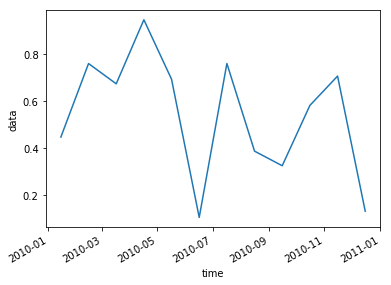

In [6]:
ds['time'] = convert_monthssince_datetime(ds['time'])
ds['data'].plot()

In [7]:
ds['time'].attrs

OrderedDict()

In [8]:
ds.to_netcdf('test.nc')

In [9]:
ddd = xr.open_dataset('test.nc')

In [11]:
ddd['data'].groupby('time.month').plot()

AttributeError: 'DataArrayGroupBy' object has no attribute 'plot'